# WeatherPy

#### **Observable Trends**

##### 1) Temperature shows a strong positive correlation with latitude in both hemispheres.
##### 2) Humidity, cloudiness, and wind speed show almost no correlation with latitudes in both hemispheres.
##### 3) Even randomly chosen city locations are biased, and are dominantly from the Northern Hemisphere, where majority of the Earth's landmass is concentrated, as we know. The Northern Hemisphere also has more inhabited areas and weather stations at higher latitudes as compared to the Southern Hemisphere.

In [1]:
# Dependencies and setup.

%matplotlib inline

import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Import citipy to get cities based on latitude and longitude
from citipy import citipy

# Output file (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Weather API key.
weather_api_key

'a6a71f9604b1a38f6deb7dbe79c0c329'

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities.
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat-lng combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Add to cities list only if city is unique.
    if city not in cities:
         cities.append(city)

# Print the city count to check for sufficient count.
len(cities)

597

## Perform API Calls

In [4]:
# Starting empty lists to store all data after retrieval.

new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
latitude = []
longitude = []
wind = []

In [5]:
# Starting URL for Open Open Weather Map API Call.

record_counter = 0
set_counter = 0

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Print the data header.
print("BEGINNING DATA RETRIEVAL")
print("-----------------------------------------")

for city in cities:
    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])          
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

# Print the data footer to indicate completion of data retrieval.
print("-------------------------")
print("DATA RETRIEVAL COMPLETE")

BEGINNING DATA RETRIEVAL
-----------------------------------------
Processing record 1 of set 0 | avarua
Processing record 2 of set 0 | roald
Processing record 3 of set 0 | kasempa
Processing record 4 of set 0 | tuatapere
Processing record 5 of set 0 | kapaa
Processing record 6 of set 0 | topeka
Processing record 7 of set 0 | dasoguz
Processing record 8 of set 0 | mataura
Processing record 9 of set 0 | ushuaia
Processing record 10 of set 0 | medina
Processing record 11 of set 0 | xiaoshan
Processing record 12 of set 0 | hasaki
Processing record 13 of set 0 | rikitea
Processing record 14 of set 0 | nabire
Processing record 15 of set 0 | port blair
Processing record 16 of set 0 | lokosovo
Processing record 17 of set 0 | taolanaro
City not found!
Processing record 18 of set 0 | launceston
Processing record 19 of set 0 | torbay
Processing record 20 of set 0 | camacha
Processing record 21 of set 0 | xingyi
Processing record 22 of set 0 | mar del plata
Processing record 23 of set 0 | busselt

### Convert Raw Data to DataFrame

In [6]:
# Create a dataframe from array of JSONs.
weather_dict = {
    "City": new_cities,
    "Latitude" : latitude,
    "Longitude" : longitude, 
    "Country" : country,
    "Wind Speed" : wind,   
    "Max Temp": temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Date" : date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          550
Latitude      550
Longitude     550
Country       550
Wind Speed    550
Max Temp      550
Humidity      550
Cloudiness    550
Date          550
dtype: int64

In [7]:
# Display the dataframe.        
weather_data.head()

,City,Latitude,Longitude,Country,Wind Speed,Max Temp,Humidity,Cloudiness,Date
0,avarua,-21.21,-159.78,CK,2.24,71.60,94,100,1601110256
1,roald,62.58,6.13,NO,26.40,48.20,70,40,1601110256
2,kasempa,-13.46,25.83,ZM,1.81,102.15,11,78,1601110257
3,tuatapere,-46.13,167.68,NZ,5.01,52.00,74,56,1601110206
4,kapaa,22.08,-159.32,US,13.87,80.60,74,20,1601110257


In [8]:
cities_list = zip(new_cities, latitude, longitude, country, temp, humidity, cloudiness, wind, date)

# Set variable for output file.
output_file = os.path.join("output_data", "cities.csv")

#  Open the output file.
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

## Inspect the data and remove the cities where the humidity > 100%.

In [9]:
#  Get indices of cities with humidity over 100%.
all_weather_data = weather_data[(weather_data["Humidity"] > 100)].index

# Make new dataframe after dropping all humidity > 100% by index.
weather_data_final = weather_data.drop(all_weather_data, inplace=False)
weather_data_final

,City,Latitude,Longitude,Country,Wind Speed,Max Temp,Humidity,Cloudiness,Date
0,avarua,-21.21,-159.78,CK,2.24,71.60,94,100,1601110256
1,roald,62.58,6.13,NO,26.40,48.20,70,40,1601110256
2,kasempa,-13.46,25.83,ZM,1.81,102.15,11,78,1601110257
3,tuatapere,-46.13,167.68,NZ,5.01,52.00,74,56,1601110206
4,kapaa,22.08,-159.32,US,13.87,80.60,74,20,1601110257
...,...,...,...,...,...,...,...,...,...
545,bourges,47.25,2.42,FR,14.99,51.01,76,90,1601110394
546,dandong,40.13,124.39,CN,4.47,67.10,72,0,1601110394
547,lata,40.16,-8.33,PT,5.86,63.00,74,13,1601110394
548,kavaratti,10.57,72.64,IN,5.82,86.00,74,75,1601110394


In [10]:
# Extract fields from dataframe.
lats = weather_data_final["Latitude"]
max_temps = weather_data_final["Max Temp"]
humidity = weather_data_final["Humidity"]
cloudiness = weather_data_final["Cloudiness"]
wind_speed = weather_data_final["Wind Speed"]

# Export data to a csv file.
weather_data_final.to_csv(output_data_file, index_label="City_ID")

## **Plotting the Data**

## Latitude vs. Temperature Plot

In [11]:
# Format date stamp

date = datetime.datetime.fromtimestamp(
        int(weather_data['Date'][0])
    ).strftime('%m/%d/%Y')

print(date)

09/26/2020


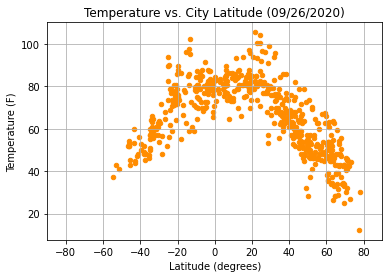

In [12]:
weather_data_final.plot(kind="scatter", x="Latitude", y="Max Temp", c="DarkOrange")
plt.title("Temperature vs. City Latitude ({})".format(date))
plt.xlabel("Latitude (degrees)")
plt.xlim([-90, 90])
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("output_data/Temperature_vs_Latitude.png")

##### Matplotlib is used to prepare the above plot. The code defines the plot type and plot area, and adds title and axes labels. Finally, it is saved as a PNG file.
#####  Analysis: The plot demonstrates that temperatures are higher at lower latitudes, as we get closer to the Equator. It also shows an overall higher number of cities were randomly chosen from the Northern Hemisphere.

## Latitude vs. Humidity Plot

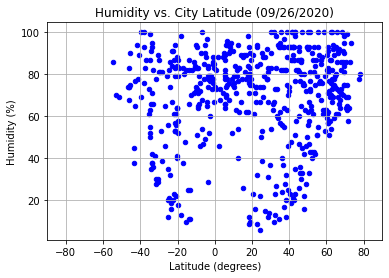

In [13]:
weather_data_final.plot(kind="scatter",x="Latitude",y="Humidity", c="Blue")
plt.title("Humidity vs. City Latitude ({})".format(date))
plt.xlabel("Latitude (degrees)")
plt.xlim([-90, 90])
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("output_data/Humidity_vs_Latitude.png")

##### Matplotlib is used to prepare the above plot. The code defines the plot type and plot area, and adds title and axes labels. Finally, it is saved as a PNG file.
##### Analysis: The plot demonstrates that high humidites are found at all latitudes, but lower and medium humidity levels seem to be concentrated within the 10-40 degree latitude range to both the north and south of the Equator. It also shows an overall higher number of cities were randomly chosen from the Northern Hemisphere.

## Latitude vs. Cloudiness Plot

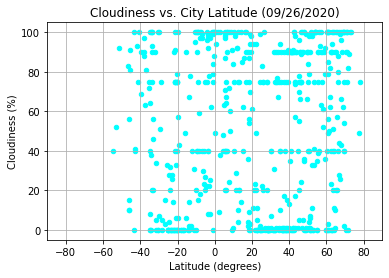

In [14]:
weather_data_final.plot(kind="scatter",x="Latitude",y="Cloudiness", c="Cyan")
plt.title("Cloudiness vs. City Latitude ({})".format(date))
plt.xlabel("Latitude (degrees)")
plt.xlim([-90, 90])
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("output_data/Cloudiness_vs_Latitude.png")

##### Matplotlib is used to prepare the above plot. The code defines the plot type and plot area, and adds title and axes labels. Finally, it is saved as a PNG file.
##### Analysis: The plot shows no specific relationship between cloudiness and latitude since all levels of cloudiness occur at all latitudes. It also shows an overall higher number of cities were randomly chosen from the Northern Hemisphere.

## Latitude vs. Wind Speed Plot

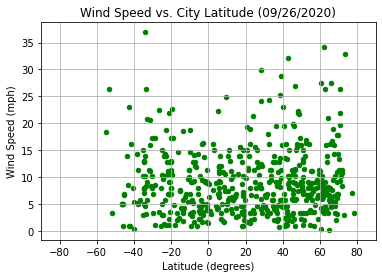

In [15]:
weather_data_final.plot(kind="scatter",x="Latitude",y="Wind Speed", c="Green")
plt.title("Wind Speed vs. City Latitude ({})".format(date))
plt.xlabel("Latitude (degrees)")
plt.xlim([-90, 90])
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/WindSpeed_vs_Latitude.png")

##### Matplotlib is used to prepare the above plot. The code defines the plot type and plot area, and adds title and axes labels. Finally, it is saved as a PNG file.
##### Analysis: The plot shows no specific relation between wind and latitude since all wind speeds occur at all latitudes. It also shows an overall higher number of cities were randomly chosen from the Northern Hemisphere.

## **Linear Regression**

In [16]:
# Create Northern and Southern Hemisphere dataframes.

N_hemi_df = weather_data_final.loc[weather_data_final["Latitude"]>0]
S_hemi_df = weather_data_final.loc[weather_data_final["Latitude"]<0]

In [17]:
N_hemi_df

,City,Latitude,Longitude,Country,Wind Speed,Max Temp,Humidity,Cloudiness,Date
1,roald,62.58,6.13,NO,26.40,48.20,70,40,1601110256
4,kapaa,22.08,-159.32,US,13.87,80.60,74,20,1601110257
5,topeka,39.05,-95.68,US,11.41,68.00,88,1,1601110257
6,dasoguz,41.84,59.97,TM,16.11,68.00,21,0,1601110257
9,medina,24.47,39.61,SA,2.30,100.40,6,0,1601110258
...,...,...,...,...,...,...,...,...,...
545,bourges,47.25,2.42,FR,14.99,51.01,76,90,1601110394
546,dandong,40.13,124.39,CN,4.47,67.10,72,0,1601110394
547,lata,40.16,-8.33,PT,5.86,63.00,74,13,1601110394
548,kavaratti,10.57,72.64,IN,5.82,86.00,74,75,1601110394


In [18]:
S_hemi_df

,City,Latitude,Longitude,Country,Wind Speed,Max Temp,Humidity,Cloudiness,Date
0,avarua,-21.21,-159.78,CK,2.24,71.60,94,100,1601110256
2,kasempa,-13.46,25.83,ZM,1.81,102.15,11,78,1601110257
3,tuatapere,-46.13,167.68,NZ,5.01,52.00,74,56,1601110206
7,mataura,-46.19,168.86,NZ,5.01,52.00,74,10,1601110258
8,ushuaia,-54.80,-68.30,AR,18.34,37.40,86,40,1601110149
...,...,...,...,...,...,...,...,...,...
533,sumenep,-7.02,113.87,ID,12.75,87.64,54,97,1601110391
534,passos,-20.72,-46.61,BR,3.47,64.15,56,6,1601110391
536,ambilobe,-13.20,49.05,MG,4.21,95.29,25,1,1601110392
537,itupiranga,-5.13,-49.33,BR,2.30,72.68,90,27,1601110392


##### **Temperature (F) vs. Latitude in Northern Hemisphere - Linear Regression**

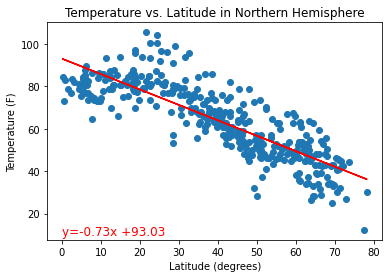

In [19]:
x_values = N_hemi_df["Latitude"]
y_values = N_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,10), fontsize=12, color="red")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude in Northern Hemisphere")
plt.show()

##### The plot above demonstrates a strong negative correlation between temperature and latitude in the Northern Hemisphere.

##### **Temperature (F) vs. Latitude in Southern Hemisphere - Linear Regression**

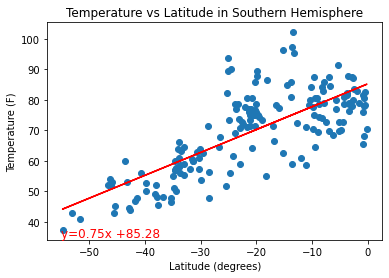

In [20]:
x_values = S_hemi_df["Latitude"]
y_values = S_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,35), fontsize=12, color="red")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Latitude in Southern Hemisphere")
plt.show()

##### The plot above demonstrates a strong positive correlation between temperature and latitude in the Southern Hemisphere.

#### **Humidity (%) vs. Latitude in Northern Hemisphere - Linear Regression**

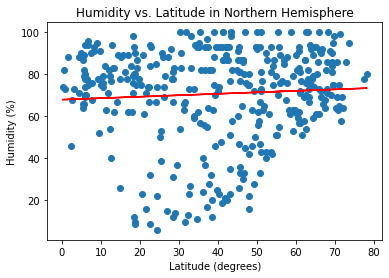

In [21]:
x_values = N_hemi_df["Latitude"]
y_values = N_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,0), fontsize = 12, color ='red')
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude in Northern Hemisphere")
plt.show()

##### The plot above demonstrates a weakly positive or almost no correlation between humidity and latitude in the Northern Hemisphere.

#### **Humidity (%) vs. Latitude in Southern Hemisphere - Linear Regression**

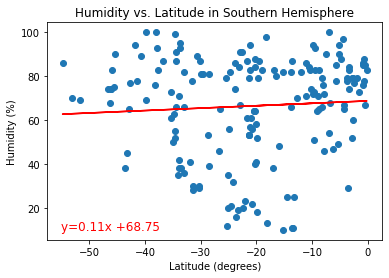

In [22]:
x_values = S_hemi_df["Latitude"]
y_values = S_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,10), fontsize = 12, color ='red')
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude in Southern Hemisphere")
plt.show()

##### The plot above demonstrates a weakly positive or almost no correlation between humidity and latitude in the Southern Hemisphere.

#### **Cloudiness (%) vs. Latitude in Northern Hemisphere - Linear Regression**

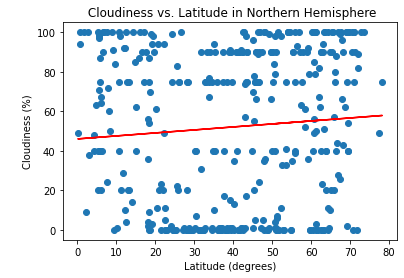

In [23]:
x_values = N_hemi_df["Latitude"]
y_values = N_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-18,62), fontsize = 12, color ='red')
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title(" Cloudiness vs. Latitude in Northern Hemisphere")
plt.show()

##### The plot above demonstrates a weakly positive ot almost no correlation between cloudiness and latitude in the Northern Hemisphere.

#### **Cloudiness (%) vs. Latitude in Southern Hemisphere - Linear Regression**

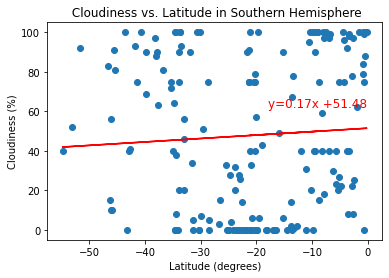

In [24]:
x_values = S_hemi_df["Latitude"]
y_values = S_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-18,62), fontsize = 12, color ='red')
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")
plt.title(" Cloudiness vs. Latitude in Southern Hemisphere")
plt.show()

##### The plot above demonstrates a weakly positive or almost no correlation between cloudiness and latitude in the Southern Hemisphere.

#### **Wind Speed (mph) vs. Latitude in Northern Hemisphere - Linear Regression**

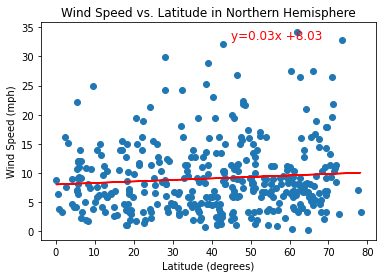

In [25]:
x_values = N_hemi_df["Latitude"]
y_values = N_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(45,33), fontsize = 12, color = "red")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs. Latitude in Northern Hemisphere")
plt.show()

##### The plot above demonstrates a weakly positive or almost no correlation between wind speed and latitude in the Northern Hemisphere.

#### **Wind Speed (mph) vs. Latitude in Southern Hemisphere - Linear Regression**

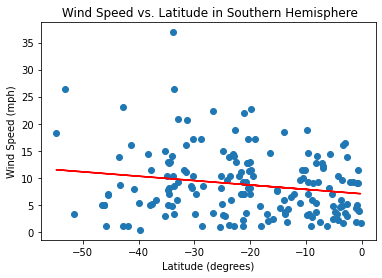

In [26]:
x_values = S_hemi_df["Latitude"]
y_values = S_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-20,39), fontsize = 12, color = "red")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed (mph)")
plt.title(" Wind Speed vs. Latitude in Southern Hemisphere")
plt.show()

##### The plot above demonstrates a weakly negative or nearly no correlation between wind speed and latitude in the Southern Hemisphere.